In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Our model is specified by the following equations:

\begin{equation}\label{expert_recognition}
E_{ij}^{\alpha} =  |w_i B_i - w_j B_j| + E_j - |T - w_j B_j
\end{equation}

\begin{equation}
E_j = \sum_{n=1}^{K} E_{kj}
\end{equation}

\begin{equation}
w_i^{t+1} = w_i^t +   wE + (something like internal field?) + something regarding ppl
\end{equation}


Let $B_i$ be the belief of subject i, defined as a probability mass function over $M$ possible outcomes. We will consider for simplicity the simple case of a binary outcome $X$

First term: 

Model 1:
$(w_i - w_j)$

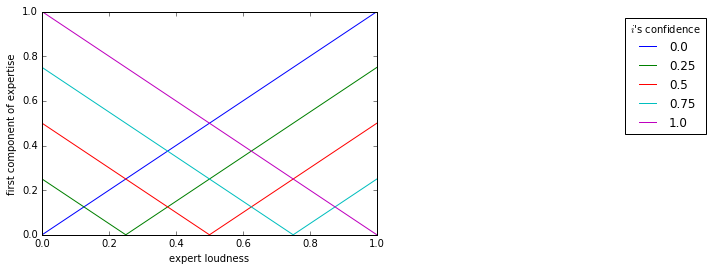

In [82]:
w_i = np.linspace(0,1,5)
w_j = np.linspace(0,1,5)
for i,v in enumerate(w_i):
    x = np.abs(w_j - w_i[i])
    plt.plot(w_j, x)
    plt.xlabel('expert loudness')
    plt.ylabel('first component of expertise')
    
plt.legend(w_i, title="$i$'s confidence", bbox_to_anchor=(1, 1, 1, 0))

Model 2: 
\begin{equation}
\frac{w_i}{ w_j}
\end{equation}

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


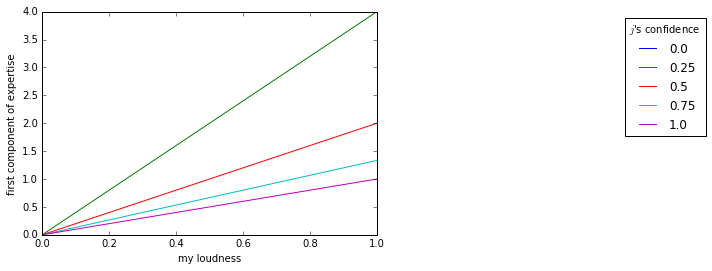

In [85]:
for j,v in enumerate(w_j):
    x = np.abs(w_i / w_j[j])
    plt.plot(w_i, x)
    plt.xlabel('my loudness')
    plt.ylabel('first component of expertise')
    
plt.legend(w_j, title="$j$'s confidence", bbox_to_anchor=(1, 1, 1, 0))

Model 3: Overlap between two beta distributions

In [74]:
from scipy.stats import beta
# beta parameters
a1,b1 = 2,3
a2,b2 = 3,4
# compute beta distributions
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
beta1 = beta.pdf(x, a1, b1)
beta2 = beta.pdf(x, a2, b2)


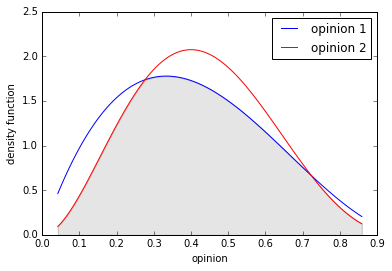

In [75]:
plt.plot(x,beta1)
plt.plot(x,beta2, 'r')
plt.fill_between(x=x, y1=[min(beta1[i],beta2[i]) for i,v in enumerate(beta1)], alpha=.2, facecolor='gray')
plt.xlabel('opinion')
plt.ylabel('density function')
plt.legend(['opinion 1','opinion 2'])

In [48]:
# Calculate overlap between the two KDEs.
from scipy.integrate import quad
def y_pts(pt, a1,a2,b1,b2):
    y_pt = min(beta.pdf(pt, a1, b1), beta.pdf(pt, a2, b2))
    return y_pt

# support of the integral
xmin, xmax = 0, 1
x_pts = np.mgrid[xmin:xmax:1000j]

# Store overlap value.
overlap, err = quad(y_pts, 0, 1, args=(a1,a2,b1,b2)) 

In [49]:
overlap

1.0